In [23]:
from qiskit import *
from qiskit.visualization import *
from math import sqrt, pi

# 1.2  The Atoms of Computation

In [2]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [8]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q, n_b)#nq qubits, nb output bits
for j in range(n):
    qc_output.measure(j, j)#qubit j writes to bit j
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

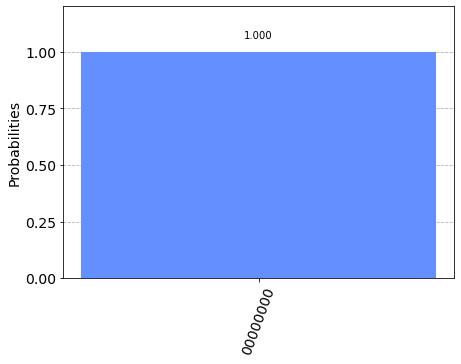

In [9]:
sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_output)
result = sim.run(qobj).result()

counts = result.get_counts()
plot_histogram(counts)

In [14]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7) #not gate on qubit 7
qc_encode.x(5)
qc_encode.x(1)
qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [15]:
qc = qc_encode + qc_output
qc.draw()

┌─┐                     
q_0: ─────┤M├─────────────────────
     ┌───┐└╥┘            ┌─┐      
q_1: ┤ X ├─╫─────────────┤M├──────
     └───┘ ║ ┌─┐         └╥┘      
q_2: ──────╫─┤M├──────────╫───────
           ║ └╥┘┌─┐       ║       
q_3: ──────╫──╫─┤M├───────╫───────
           ║  ║ └╥┘┌─┐    ║       
q_4: ──────╫──╫──╫─┤M├────╫───────
     ┌───┐ ║  ║  ║ └╥┘    ║ ┌─┐   
q_5: ┤ X ├─╫──╫──╫──╫─────╫─┤M├───
     └───┘ ║  ║  ║  ║ ┌─┐ ║ └╥┘   
q_6: ──────╫──╫──╫──╫─┤M├─╫──╫────
     ┌───┐ ║  ║  ║  ║ └╥┘ ║  ║ ┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  2  3  4  6  1  5  7

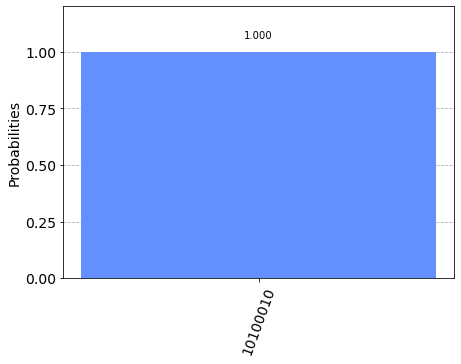

In [16]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [31]:
qc_cnot = QuantumCircuit(2, 2)
qc_cnot.x(0)
qc_cnot.cx(0, 1) #cx = cnot equiv. xor
                 #cx applies to second qubit
qc_cnot.measure(0, 0)
qc_cnot.measure(1, 1)
qc_cnot.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [36]:
#half adder
qc_ha = QuantumCircuit(4, 2)#inputs in q0 and q1
qc_ha.x(0)
#qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0, 2)#dont modify input, use q2
qc_ha.cx(1, 2)
qc_ha.ccx(0, 1, 3)#also known as toffoli gate, flips q3 if q0 and q1 are 1
                  #and gate
qc_ha.barrier()
qc_ha.measure(2, 0)
qc_ha.measure(3, 1)
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     └───┘ ░   │         │   ░       
q_1: ──────░───┼────■────■───░───────
           ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

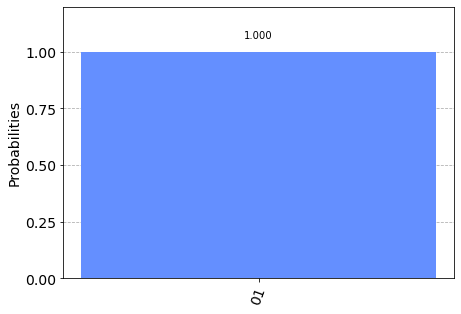

In [37]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

# 1.3 Representing Qubit States

In [86]:
from math import sqrt, pi
qc = QuantumCircuit(1)
initial_state = [1/sqrt(3), sqrt(2)/sqrt(3)] #|1>
qc.initialize(initial_state, 0) # apply state to q0
qc.measure_all()
qc.draw()

┌────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.57735,0.8165) ├─░─┤M├
        └────────────────────────────┘ ░ └╥┘
meas: 1/══════════════════════════════════╩═
                                          0

{'0': 350, '1': 650}


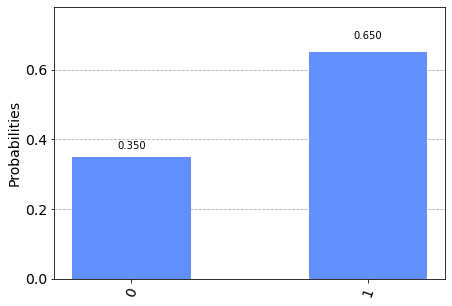

In [89]:

svsim = Aer.get_backend('qasm_simulator')
"""
qobj = assemble(qc)
result = svsim.run(qobj).result()

print(result.get_statevector())
"""

qobj = assemble(qc, svsim, shots=1000)
res = svsim.run(qobj).result()
counts = res.get_counts()
print(counts)
plot_histogram(counts)

In [93]:
qc = QuantumCircuit(1)
initial_state = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw()

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

In [94]:
qobj = assemble(qc)
svsim = Aer.get_backend('statevector_simulator')
state = svsim.run(qobj).result().get_statevector()
print('qubit state', state)

qubit state [0.        +0.70710678j 0.70710678+0.j        ]


In [95]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

In [112]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+1.j 0.+0.j]


$P(|x\rangle) = |\langle x|\phi\rangle|^2$ (probability of measuring $\phi$ and getting $x$

$\langle x | \phi \rangle = \text{inner (dot) product}$

$\text{Ex. } |q_0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle$

$P(|0\rangle) = \left(\frac{1}{\sqrt{2}}\langle 0 |0 \rangle + \frac{i}{\sqrt{2}}\langle 0|1 \rangle\right)^2 \enspace \langle 0|0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 1$

$\phantom{P(|0\rangle)} = \left(\frac{1}{\sqrt{2}}\cdot 1 + \frac{i}{\sqrt{2}} \cdot 0\right)^2$

$\phantom{P(|0\rangle)} = \left(\frac{1}{\sqrt{2}}\right)^2 = \boxed{\frac{1}{2}}$

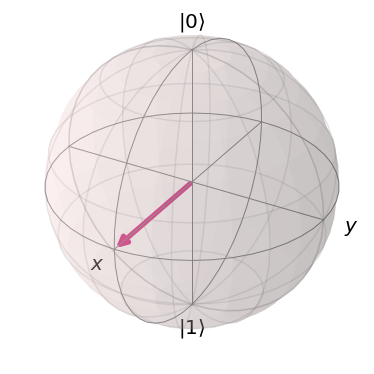

In [113]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] #|+>, [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

$|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle$

$|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$

# 1.4 Single Qubit Gates

In [5]:
qc = QuantumCircuit(1)
qc.x(0) #rotation by pi radians about x axis
qc.y(0)
qc.z(0)
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Y ├┤ Z ├
     └───┘└───┘└───┘

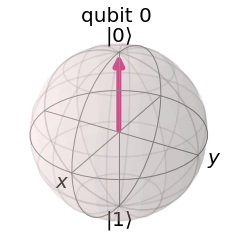

In [6]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [1]:
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$

$Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}$

$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$

$H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

$P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}$

In [18]:
def x_measure(qc, qbit, cbit):
    qc.h(qbit)
    qc.measure(qbit, cbit)
    return qc

#initial_state = [1/sqrt(2), -1/sqrt(2)] #|-> qubit
initial_state = [0, 1]
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measure(qc, 0, 0)  #q0 to c0
qc.draw()

┌─────────────────┐┌───┐┌─┐
q_0: ┤ initialize(0,1) ├┤ H ├┤M├
     └─────────────────┘└───┘└╥┘
c: 1/═════════════════════════╩═
                              0

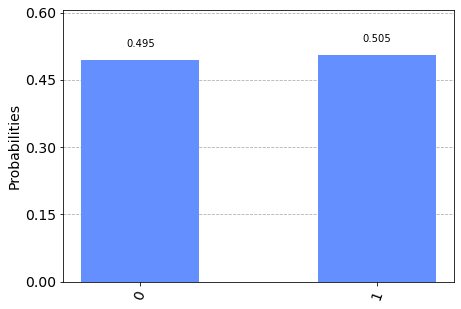

In [20]:
qasmsim = Aer.get_backend('qasm_simulator') 
qobj = assemble(qc)  
counts = qasmsim.run(qobj).result().get_counts()  
plot_histogram(counts) 

In [24]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0) #rotation by pi/4 radians about z-axis on qubit 0
qc.draw()

┌─────────┐
q_0: ┤ RZ(π/4) ├
     └─────────┘

In [26]:
qc = QuantumCircuit(1)
qc.s(0)   # rotation by pi/2 radians about z-axis (SS = Z)
qc.sdg(0) # negative s-gate
qc.draw()

┌───┐┌─────┐
q_0: ┤ S ├┤ SDG ├
     └───┘└─────┘

In [27]:
qc = QuantumCircuit(1)
qc.t(0)   # pi/4 radians
qc.tdg(0) # negative t
qc.draw()

┌───┐┌─────┐
q_0: ┤ T ├┤ TDG ├
     └───┘└─────┘